In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import json

In [49]:
# seaborn_dataset.p

# titanic 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

# titanic 데이터셋 살펴보기
print(titanic.head())
print('\n')
print(titanic.info())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

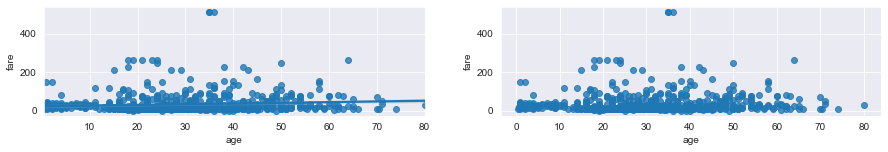

In [2]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig =plt.figure(figsize=(15,2))
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)
 
# 그래프 그리기 - 선형회귀선 표시(fit_reg=True)
sns.regplot(x='age', y='fare',data=titanic, ax=ax1)
sns.regplot(x='age', y='fare',data=titanic, ax=ax2,fit_reg=False)


plt.show()

C:\Users\KI\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


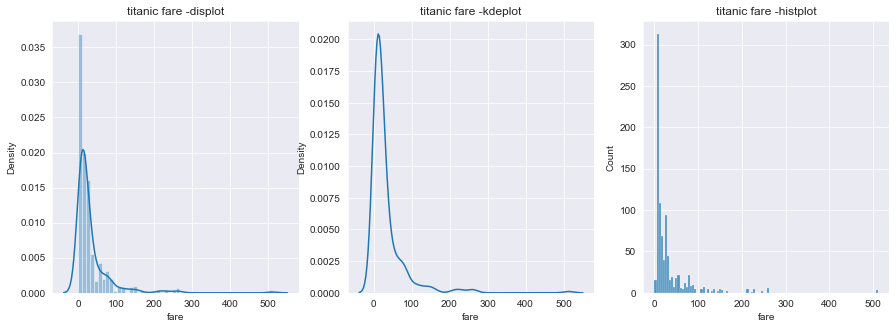

In [4]:
# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig =plt.figure(figsize=(15,5))
ax1= fig.add_subplot(1,3,1)
ax2= fig.add_subplot(1,3,2)
ax3= fig.add_subplot(1,3,3)

# distplot
sns.distplot(titanic['fare'], ax=ax1)

# kdeplot
sns.kdeplot(x='fare',data=titanic,ax=ax2)

# histplot
sns.histplot(x='fare',data=titanic,ax=ax3)

# 차트 제목 표시
ax1.set_title('titanic fare -displot')
ax2.set_title('titanic fare -kdeplot')
ax3.set_title('titanic fare -histplot')

plt.show()

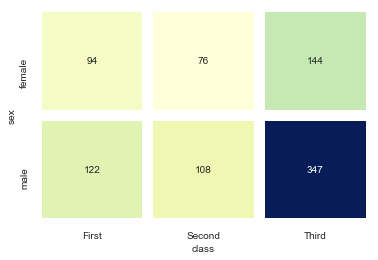

In [8]:
# seaborn_heatmap
# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table=titanic.pivot_table(index=['sex'],columns=['class'],aggfunc='size')

# 히트맵 그리기
sns.heatmap(table,annot=True, fmt='d', cmap='YlGnBu',linewidth=10,cbar=False)
# 괄호 순서대로 데이터프레임 ,데이터 값 표시 여부, 정수형 포맷 ,컬러 맵 ,구분 선 ,컬러 바 표시 여부

plt.show()

C:\Users\KI\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


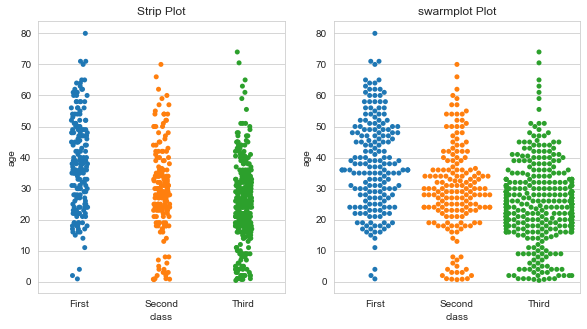

In [10]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig =plt.figure(figsize=(15,5))
ax1= fig.add_subplot(1,3,1)
ax2= fig.add_subplot(1,3,2)
 
# 이산형 변수의 분포 - 데이터 분산 미고려
sns.stripplot(x='class',y='age',data=titanic,ax=ax1)
                    #x축 변수
                    #y축 변수           
                    #데이터셋 - 데이터프레임
                    #axe 객체 - 1번째 그래프 

# 이산형 변수의 분포 - 데이터 분산 고려 (중복 X)
sns.swarmplot(x='class',y='age',data=titanic,ax=ax2)
                    #x축 변수
                    #y축 변수
                    #데이터셋 - 데이터프레임
                    #axe 객체 - 2번째 그래프        

# 차트 제목 표시
ax1.set_title('Strip Plot')
ax2.set_title('swarmplot Plot')

plt.show()

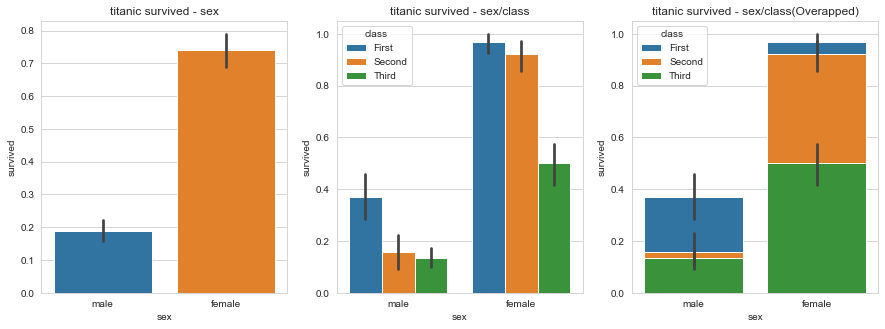

In [14]:
# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# x축, y축에 변수 할당
sns.barplot(x='sex',y='survived', data=titanic, ax=ax1)


# x축, y축에 변수 할당하고 hue 옵션 추가 
sns.barplot(x='sex',y='survived', hue='class', data=titanic, ax=ax2)


# x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력
sns.barplot(x='sex',y='survived', hue='class',dodge=False, data=titanic, ax=ax3)



# 차트 제목 표시
ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(Overapped)')

plt.show()

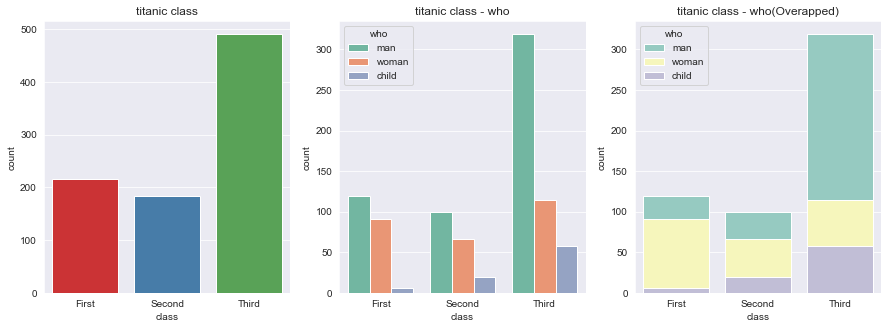

In [3]:
# %load 4.31_seaborn_count.py
# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# 기본값
sns.countplot(x='class',palette='Set1',data=titanic,ax=ax1)

# hue 옵션에 'who' 추가
sns.countplot(x='class',hue='who',palette='Set2',data=titanic,ax=ax2)
# dodge=False 옵션 추가 (축 방향으로 분리하지 않고 누적 그래프 출력)
sns.countplot(x='class',hue='who',palette='Set3',dodge=False,data=titanic,ax=ax3)
# 차트 제목 표시
ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(Overapped)')

plt.show()

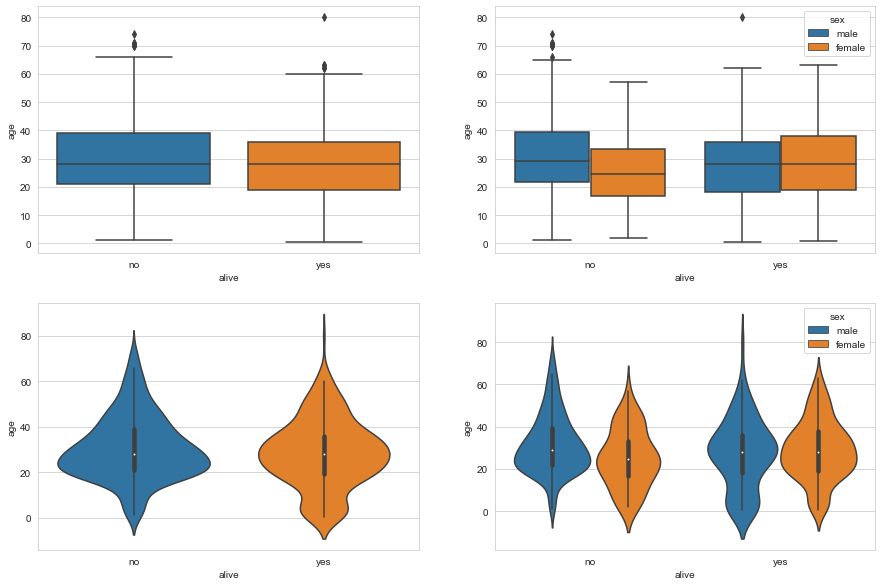

In [7]:
# seaborn_box_violin
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 4개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 10))   
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
 
# 박스 그래프 - 기본값
sns.boxplot(x='alive',y='age',data=titanic,ax=ax1)

# 바이올린 그래프 - hue 변수 추가
sns.boxplot(x='alive',y='age',hue='sex', data=titanic, ax=ax2)

# 박스 그래프 - 기본값
sns.violinplot(x='alive',y='age',data=titanic,ax=ax3)

# 바이올린 그래프 - hue 변수 추가
sns.violinplot(x='alive',y='age',hue='sex',data=titanic,ax=ax4)
plt.show()

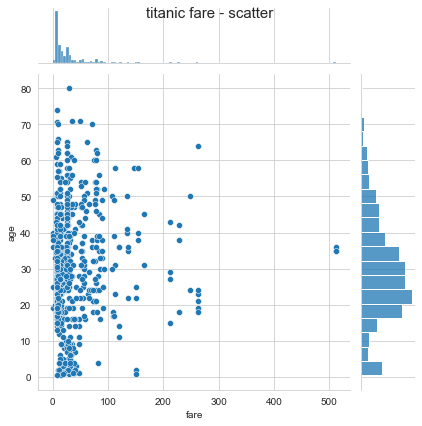

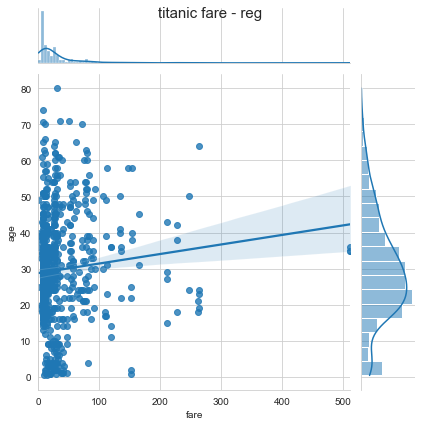

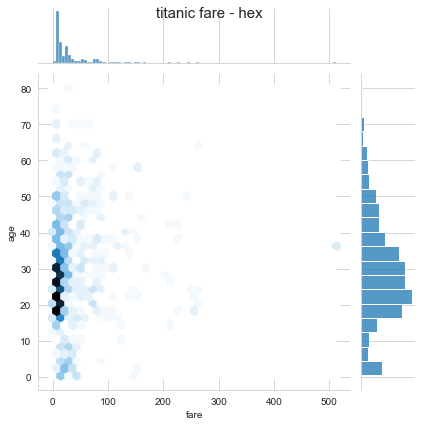

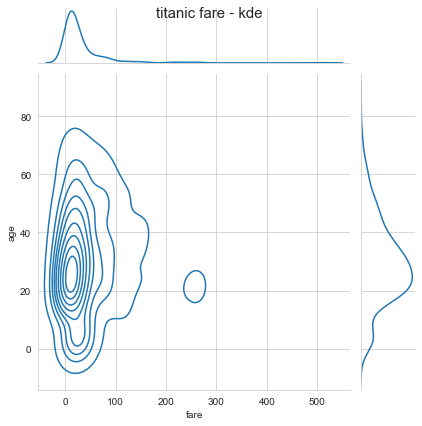

In [8]:
# seaborn_joint
# 조인트 그래프 - 산점도(기본값)
j1=sns.jointplot(x='fare',y='age',data=titanic)

# 조인트 그래프 - 회귀선
j2=sns.jointplot(x='fare',y='age',kind='reg',data=titanic)

# 조인트 그래프 - 육각 그래프
j3=sns.jointplot(x='fare',y='age',kind='hex',data=titanic)

# 조인트 그래프 - 커럴 밀집 그래프
j4=sns.jointplot(x='fare',y='age',kind='kde',data=titanic)

# 차트 제목 표시
j1.fig.suptitle('titanic fare - scatter', size=15)
j2.fig.suptitle('titanic fare - reg', size=15)
j3.fig.suptitle('titanic fare - hex', size=15)
j4.fig.suptitle('titanic fare - kde', size=15)

plt.show()

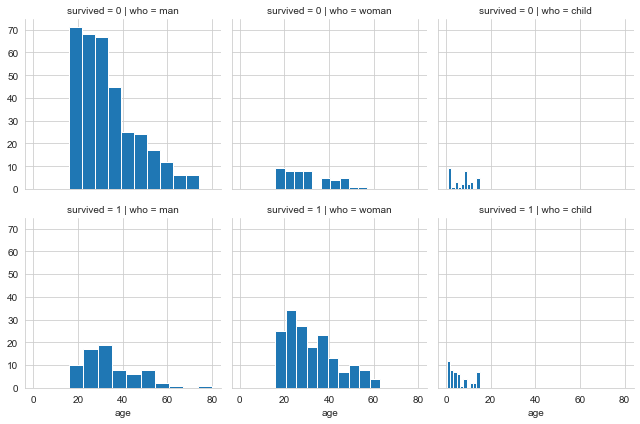

In [10]:
# seaborn_facetgrid
# 조건에 따라 그리드 나누기 -선택해서 행과 열을 반영해보기
g=sns.FacetGrid(data=titanic,col='who',row='survived')

# 그래프 적용하기 
g=g.map(plt.hist,'age')


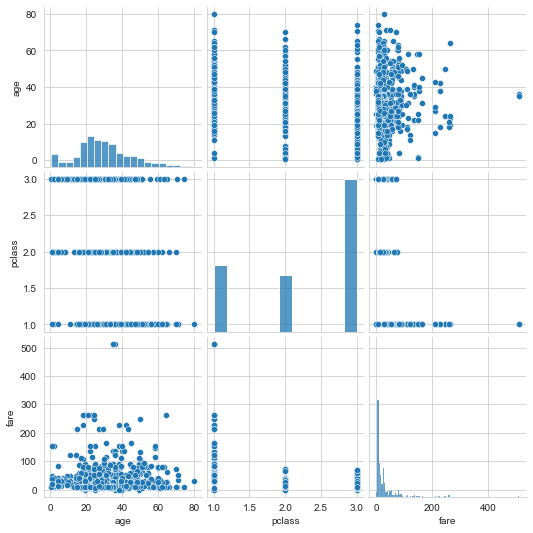

In [12]:
# seaborn_pairplot
# titanic 데이터셋 중에서 분석 데이터 선택하기
titanic_pair =titanic[['age','pclass','fare']]
# 조건에 따라 그리드 나누기
g=sns.pairplot(titanic_pair)



In [23]:
# folium_map

# 라이브러리 불러오기
import folium

# 서울 지도 만들기
secoul_map=folium.Map(location=[37.55,126.98], zoom_star=12)

# 지도를 HTML 파일로 저장하기
secoul_map.save('seoul.html')
secoul_map

In [24]:
# folium_map_tiles
# 서울 지도 만들기
secoul_map2=folium.Map(location=[37.55,126.98],tiles='Stamen Terrain', zoom_star=12)


# 지도를 HTML 파일로 저장하기
secoul_map2.save('seoul2.html')
secoul_map2

In [25]:
# folium_map_tiles
# 서울 지도 만들기
secoul_map3=folium.Map(location=[37.55,126.98],tiles='Stamen Toner', zoom_star=12)


# 지도를 HTML 파일로 저장하기
secoul_map3.save('seoul3.html')
secoul_map3

In [57]:
# folium_map_marker

# 대학교 리스트를 데이터프레임 변환
df = pd.read_excel('csv,xlsx/서울지역 대학교 위치.xlsx', engine= 'openpyxl', index_col=0)

# 서울 지도 만들기
secoul_map=folium.Map(location=[37.55,126.98],tiles='Stamen Terrain', zoom_star=12)

# tiles = Stamen Toner : 하천과 길 위주로 보여줌
# tiles = Stamen Terrain : 산림위주의 지도

# 대학교 위치정보를 Marker로 표시
for name,lat,lng in zip(df.index,df.위도,df.경도):
    folium.Marker([lat,lng],tooltip=name).add_to(secoul_map)


# tooltip = name 하면 마우스 오버시 표기
# popup = name 시에는 마우스 클릭 표기

# 지도를 HTML 파일로 저장하기
secoul_map.save('seoul_College.jpg')
secoul_map

In [56]:
# folium_map_circlemarker

# 서울 지도 만들기
df = pd.read_excel('csv,xlsx/서울지역 대학교 위치.xlsx', engine= 'openpyxl', index_col=0)
seoul_map2 = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

# 대학교 위치정보를 CircleMarker로 표시
for name,lat,lng in zip(df.index,df.위도,df.경도):
    folium.Marker([lat,lng],raduis=10,color='brown',
                  fill=True,fill_color='coral',fill_opacity=0.7,popup=name).add_to(secoul_map2)

# 지도를 HTML 파일로 저장하기
seoul_map2

In [59]:
# folium_choropleth

# 경기도 인구변화 데이터를 불러와서 데이터프레임으로 변환'
file_path ='csv,xlsx/경기도인구데이터.xlsx'
df = pd.read_excel(file_path,index_col='구분',engine='openpyxl')
df.columns=df.columns.map(str)

# 경기도 시군구 경계 정보를 가진 geo-json 파일 불러오기
geo_path= 'csv,xlsx/경기도행정구역경계.json'
try : 
    geo_data = json.load(open(geo_path,encoding='utf-8'))
except:
    geo_data = json.load(open(geo_path,encoding='utf-8-sig' ))

# 경기도 지도 만들기
g_map = folium.Map(location=[37.5502,126.982],
                  titles='Steam Terrain',zoom_start=9)


# 출력할 연도 선택 (2007 ~ 2017년 중에서 선택)
year='2017'

# Choropleth 클래스로 단계구분도 표시하기
folium.Choropleth(geo_data=geo_data, data=df[year],columns=[df.index,df[year]],fill_color='YlOrRd',
                 fill_opacity=0.7,line_opacity=0.3,threshold_scale=[10000,100000,300000,500000,700000],
                 key_on='feature.properties.name',).add_to(g_map)


# 지도를 HTML 파일로 저장하기
g_map.save('gyonggi_population_' + year + '.html')

g_map